In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# package that performs scraping of genius website to obtain lyrics and meta data
from lyricsgenius import Genius
import pandas as pd
#config file with token from genius
import config
token = config.lyricsgenius['token']
genius = Genius(token)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

In [2]:

# Remove section headers (e.g. [Chorus]) from lyrics when searching
genius.remove_section_headers = True
# Exclude songs with these words in their title
genius.excluded_terms = ["(Remix)", "(Live)"]

In [3]:
artist_cluster_2 = pd.read_csv('data/clusters/uri_map_2nd_cluster.csv')
artist_cluster_2.head()

,uri,name,iso_nn6_nc2_1,iso_nn6_nc2_2,se_nn6_nc2_1,se_nn6_nc2_2,km_nn6_nc2,iso_nn9_nc3_1,iso_nn9_nc3_2,iso_nn9_nc3_3,se_nn9_nc3_1,se_nn9_nc3_2,se_nn9_nc3_3,km_nn9_nc3,iso_n6_p1,iso_n6_p2
0,spotify:artist:021hNAnkFIbyFyL97br6NB,Kellie Pickler,-1.480759,1.618373,-0.016379,-0.015795,2,-1.555861,-1.633812,0.525685,-0.016379,-0.015795,0.047647,2,-1.112067,-0.996888
1,spotify:artist:02rd0anEWfMtF7iMku9uor,Reba McEntire,-2.537292,2.994054,-0.016117,-0.015088,2,-2.034574,-2.127795,0.290227,-0.016117,-0.015088,0.043108,2,-1.520466,-1.455180
2,spotify:artist:070kGpqtESdDsLb3gdMIyx,Easton Corbin,-1.752523,-2.452210,0.049947,0.008530,0,-0.634649,1.696105,0.240836,0.049947,0.008530,0.002125,0,-0.681030,1.211234
3,spotify:artist:0BvkDsjIUla7X0k6CSWh1I,Luke Bryan,-2.671377,-3.452118,0.060709,0.013626,6,-1.732830,3.145396,-1.663726,0.060709,0.013626,0.014094,6,-1.306139,1.697363
4,spotify:artist:0FcmRWJUfnCuwoXE1H2b0H,Restless Heart,2.082428,0.711273,-0.013638,-0.006429,0,1.202562,-0.349055,-1.331200,-0.013638,-0.006429,-0.006554,0,0.760089,-0.532057


In [4]:
top_5 = artist_cluster_2.name[:5]

In [5]:
artist_list = set(artist_cluster_2.name)
len(artist_list)

170

In [6]:
def get_lyrics(name, k):
    c = 0
    # for name in arr:
    try:
        songs = (genius.search_artist(name, k, sort='popularity')).songs
        s = [song.lyrics for song in songs]
        # file.write("\n \n   <|endoftext|>   \n \n".join(s))
        c += 1
        print(f"Songs grabbed:{len(s)}")
        return s
    except:
        print(f"some exception at {name}: {c}")
    

In [7]:
songs = [get_lyrics(artist, 2) for artist in top_5]

Searching for songs by Kellie Pickler...

Song 1: "If It Wasn’t for a Woman"
Song 2: "Best Days of Your Life"

Reached user-specified song limit (2).
Done. Found 2 songs.
Songs grabbed:2
Searching for songs by Reba McEntire...

Song 1: "The Night the Lights Went Out in Georgia"
Song 2: "Fancy"

Reached user-specified song limit (2).
Done. Found 2 songs.
Songs grabbed:2
Searching for songs by Easton Corbin...

Song 1: "All Over The Road"
Song 2: "Raising Humans"

Reached user-specified song limit (2).
Done. Found 2 songs.
Songs grabbed:2
Searching for songs by Luke Bryan...

Song 1: "Most People Are Good"
Song 2: "What She Wants Tonight"

Reached user-specified song limit (2).
Done. Found 2 songs.
Songs grabbed:2
Searching for songs by Restless Heart...

Song 1: "When She Cries"
Song 2: "I’ll Still Be Loving You"

Reached user-specified song limit (2).
Done. Found 2 songs.
Songs grabbed:2


In [8]:
len(songs)

5

In [9]:
# Joining all songs in 1 block of text
text = " ".join([str(item) for item in songs])

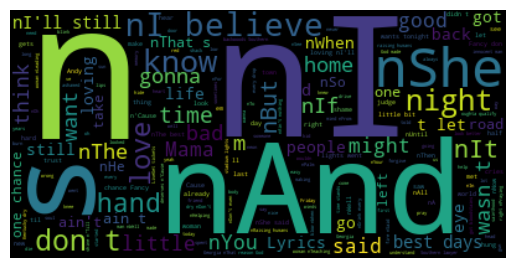

In [10]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('output/wordcloud_2nd_cluster.png')
plt.show()

------